## First Checkpoint



 ### Dataset Scraping
 
 For our project we decided to scrape data of european football transfermarket from the specialized site called Transfermakt. At first we thought to scrape data about last transfers, but at the end we decided to scrape multiple years in order to perform also time analysis, taking into consideration the pandemic effect.
 So, our dataset contains the top 625 transfers for player market value (assessed by transfermarkt) for years from 2018 to 2023.

This is a sample of our dataset:

In [44]:
import pandas as pd 

df=pd.read_csv('transfer_window.csv', sep=',')
df.head()

,Unnamed: 0,name,position,age,market_value,country_from,league_from,club_from,country_to,league_to,club_to,fee,year,General_Position
0,0,Kylian Mbappé,Centre-Forward,19,120000000,Monaco,Ligue 1,AS Monaco,France,Ligue 1,Paris Saint-Germain,180000000,2018,Attack
1,1,Cristiano Ronaldo,Centre-Forward,33,100000000,Spain,LaLiga,Real Madrid,Italy,Serie A,Juventus FC,117000000,2018,Attack
2,2,Kepa Arrizabalaga,Goalkeeper,23,20000000,Spain,LaLiga,Athletic Bilbao,England,Premier League,Chelsea FC,80000000,2018,Goalkeeper
3,3,Thomas Lemar,Attacking Midfield,22,65000000,Monaco,Ligue 1,AS Monaco,Spain,LaLiga,Atlético de Madrid,72000000,2018,Midfield
4,4,Riyad Mahrez,Right Winger,27,50000000,England,Premier League,Leicester City,England,Premier League,Manchester City,67000000,2018,Attack


### Dataset description
 Here we will give a brief description of the variables of our dataset, with the unit of measurement when necessary:
 
- **name** : name and surname of the player;
 
- **position**: specific position of the player, with 13 possible values: GOALKEEPER, RIGHT-BACK, CENTRE-BACK, LEFT-BACK, RIGHT MIDFIELD, CENTRAL MIDFIELD, LEFT MIDFIELD, DEFENSIVE MIDFIELD, ATTACKING MIDFIELD, SECOND STRIKER, LEFT WINGER, RIGHT WINGER, CENTRE- FORWARD;

- **age**: age of the player, measured in years;

- **market_value**: market value of the player, measured in euros.

- **country_from**: country of the club which sold the player.

- **league_from**: league of the club which sold the player.

- **club_from**: club which sold the player.

- **country_to**: country of the club which bought the player.

- **league_to**: league of the club which bought the player.

- **club_to**: club which bought the player.

- **fee**: the amount of money payed for the trasfer the player, measured in euros.

- **year**: year of the transfer, with 5 possible values: 2018, 2019, 2020, 2021, 2022, 2023.

- **General_Position**: general position of the player, with 4 possible values: GOALKEEPER, DEFENSE, MIDFIELD, ATTACK.
 

### Dataset Cleaning and preprocessing

We create other variables to group leagues different from the top 5 European Leagues (Bundesliga, Serie A, Premier League, LaLiga, Ligue 1) and to group the specific positions that we have into more general and easily understandable ones (goalkeeper, defense, midfield and attack). Then, for sake of simplicity, we omologate free and loan transfers by considering both of them as zero fee. 
The last thing we do is to convert the thousands symbol ('k') into '000'and dealing with very few missing values by making the fee equal to the market value.

### Exploratory Analysis and our story

The first thing we want to know is how much each different league has spent and earned from the transfermaket. So, our first visualization will be a barchart grouped by league. Since the two graphs are the same we would like to make it interactive with a radio button in order to choose between the two visualization.

In [45]:
# leagues with ascedning order of fee spent
league=df.groupby('league_to', as_index=False)['fee'].sum()
league=league.sort_values(by=['fee'], ascending=False)

import plotly.express as px
import plotly.graph_objects as go

color=["#031b5e",'#25AA0A', 'lightgrey', "#E16B19", '#7e33c5',"#ca0302" ]


fig = go.Figure(data= [go.Bar(x=league["league_to"], y=league["fee"], marker_color=color)])
fig.show()

In [46]:
import plotly.express as px

# leagues with ascedning order of fee earnt
league_from=df.groupby('league_from', as_index=False)['fee'].sum()
league_from=league_from.sort_values(by=['fee'], ascending=False)

color2=['lightgrey','#25AA0A',"#031b5e", '#7e33c5', '#E16B19', "#ca0302" ]

fig = go.Figure(data= [go.Bar(x=league_from["league_from"], y=league["fee"], marker_color=color2)])
fig.show()

The next thing we want to visualize is the top 20 club for expenditures and we plot it together with their revenues

In [47]:
#data preparation club two sided barchart
in_transfer=df.groupby(by=["club_to"]).sum(['fee'])
in_transfer=in_transfer.rename(columns={"fee": "expenditure"})
in_transfer['id']=in_transfer.index

out_transfer=df.groupby(by=["club_from"]).sum(['fee'])
out_transfer['id']=out_transfer.index
out_transfer=out_transfer.rename(columns={"fee": "revenue"})

balance=out_transfer.merge(in_transfer, how='inner', on='id')
balance=balance.loc[:,['id', 'revenue','expenditure']]
balance['expenditure'] = balance['expenditure']*(-1)

balance=balance.sort_values(by=['expenditure'])
balance_20=balance.head(20)

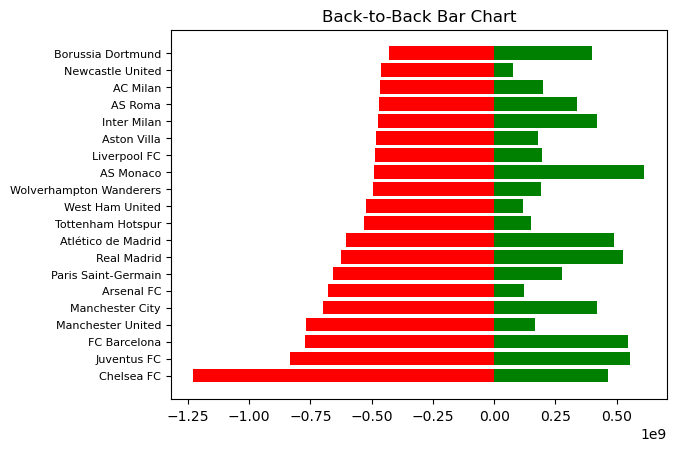

In [48]:
# plot the bars
import matplotlib.pyplot as plt

plt.barh(balance_20['id'], balance_20['revenue'], color = 'g')
plt.barh(balance_20['id'], balance_20['expenditure'], color = 'r')
plt.title("Back-to-Back Bar Chart")
plt.yticks(fontsize=8)
plt.show()

The last representation of this part concerns the top transfers for fee among these years plotted together with the respective 
league in a sankey diagram.


In [49]:
# Import the sankey function from the sankey module within pySankey
# !pip install pySankey
from pySankey.sankey import sankey

In [50]:
#taking top 30 fee
df_sorted=df.sort_values(by=['fee'], ascending=False)
df_top=df_sorted.head(30)

In [51]:
#create a color dictionary for both leagues and players making match the colors
league_color={
    "Bundesliga": "#ca0302",
    "LaLiga": "#E16B19",
    "Premier League": "#031b5e",
    "Serie A":'#25AA0A',
    'Ligue 1':'#7e33c5'
    }

for index,row in df_top.iterrows():
    league=row['league_to']
    color=league_color[league]
    key=row['name']
    league_color[key]=color

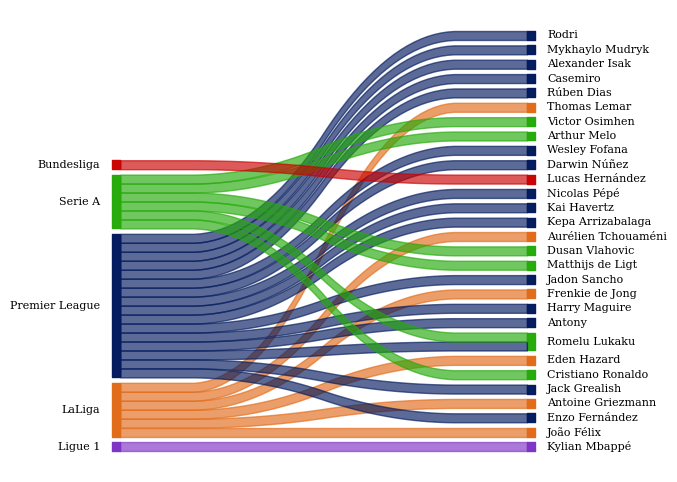

In [52]:
sankey(df_top['league_to'], df_top["name"], colorDict=league_color, fontsize=8)

### Insights from visualizations 

All these plots highlight one thing: the Premier League seems to be on another 'planet' with respect to the others. The first two plots shows that Premier League is first in Europe for expenditures among all countries and second for revenues, 'just' around 400 Milions less than Serie A.
Twe two sided barchart highlights that Chelsea FC is by far the club which spends the most. Furthermore, it is important to put in evidence that 9 out 20 teams present in the two sided barchart belong to the Premier League. The scariest part is that clubs such as Aston Villa or West Ham have never been in the first 4 places of the league, but they can afford to spend more than Inter and AC Milan, that won last two Seria A championships. The last plot ( i.e., sankey diagram), shows, finally, that almost all the top 20 highest fee transfers where made by English team. Premier League is responsible for 16 out of 30 purchases, while the nearest leagues are Serie A and LaLiga with just 6.

The next two questions that we would likt to answer are:


1- Is this difference consistent with the covid effect? 


2- Why Premier League is so special and differet?

### Covid Effect

In order to get covid drawbacks on the european market we decided to investigate two aspects: the first one is quite intuitive and it consists in looking at the total expenditures for league during the years; the second, instead, regards the zero fee transfers. The pandemic had huge consequences in terms of revenues. The main one was probably the impossibility of earning from match tickets. Less resources imply the necessity to be 'creative' and to buy player at zero or with different formulas (i.e., loan). 

In [53]:
league_year=df.groupby(['league_to', 'year'], as_index=False)['fee'].sum()
premier=league_year[league_year['league_to']=="Premier League"]
serieA=league_year[league_year['league_to']=="Serie A"]
bundesliga=league_year[league_year['league_to']=="Bundesliga"]
laliga=league_year[league_year['league_to']=="LaLiga"]
ligue1=league_year[league_year['league_to']=="Ligue 1"]
others=league_year[league_year['league_to']=="Others"]



fig_stacked_bar = go.Figure(data= [go.Bar(name='Premier League',x=premier["year"], y=premier["fee"], marker_color='#031b5e'),
                      go.Bar(name='Serie A',x=serieA["year"], y=serieA["fee"], marker_color='#25AA0A'),
                      go.Bar(name='Bundesliga',x=bundesliga["year"], y=bundesliga["fee"], marker_color='#ca0302'),
                      go.Bar(name='LaLiga',x=laliga["year"], y=laliga["fee"], marker_color='#E16B19'),
                      go.Bar(name='Ligue 1',x=ligue1["year"], y=ligue1["fee"], marker_color='#7e33c5'),
                      go.Bar(name='Others',x=others["year"], y=others["fee"], marker_color='lightgrey')])

fig_stacked_bar.update_layout(barmode='stack')

In [55]:
fig_pie=px.pie(values=[760,2974], names=['zero', 'non-zero'], title='Percentage of zero transfers')

fig_pie.update_traces(hoverinfo = 'label+percent', textfont_size = 20,
                  textinfo = 'label+percent', pull = [0.1, 0, 0.2, 0, 0, 0])

The idea is to visualize these plots one near each other, using brushing and linking. In that way, selecting year and league on the barchart, the piechart will show the corresponding proportion of zero transfers during the years. 

### Premier League interactions

In the next part we wanted to deepen our study through network analyses and map visualizations. Since doing it with all the leagues would not generate a clear graph due to the huge number of nodes, we decided to investigate only the most interesting league, the Premier League. 

The first visualization that we would like to implement is a combination of a connection map and a cloropleth map. Through the connection map we would be able to draw the connections among countries. On the other hand, through the cloropleth map we would be able to show also the nature of the relationship between Great Britain, aka Premier League, and the other country through color gradient. 

Specifically, the cloropleth map would represent the countries according to a gradient of color that corresponds to a specific value of a certain variable. For example we would like to implement both a gradient for the total earnings made by a country just from the Premier League, and both a gradient for the number of tranfers made by each country towards Premier League. 
Therefore, the color of a country would be lighter in case of a small amount for the variable. On the other hand if the value corresponding was high the intensity of the color would increase. 

In order to have a higher comprehension of the interacactions between Great Britain, aka Premier League, and all the other countries, we would like to implement on the same graph also the connection map. This would mean that the Great Britain would have several lines originating in its center and going towards every country to which it has done transfers. 

We thought also about doing a flow map instead of the coombinations of these two graphs, however it would have been less understandable how many transfers would have been from the Premier League towards the Premier League. Through cloropleth graph this instead is very clear.


In [56]:
import pycountry
d={}
countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3
    
for index,row in df.iterrows():
    country_to=row['country_to']
    code_to = countries.get(country_to ,'GBR')
    row['code_to']=code_to
    country_from=row['country_from']
    code_from = countries.get(country_from ,'GBR')
    row['code_from']=code_from
    d[index]=row
    
df=pd.DataFrame.from_dict(d, orient='index')
premier_league = df[df['league_to']=='Premier League']
color_map=premier_league.groupby(['code_from'])['age'].count().reset_index(name="count")
color_map2=premier_league.groupby(['code_from'])['fee'].sum().reset_index(name="fee")
color_map2['avg_fee']=color_map2['fee']/color_map['count']

In [57]:
import plotly.express as px

fig = px.choropleth(color_map, locations="code_from",
                    color='count', 
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

In [58]:
import networkx as nx

premier_league=df[df['league_to']=='Premier League']

G=nx.from_pandas_edgelist(premier_league, source='club_from', target='club_to', edge_attr='fee')

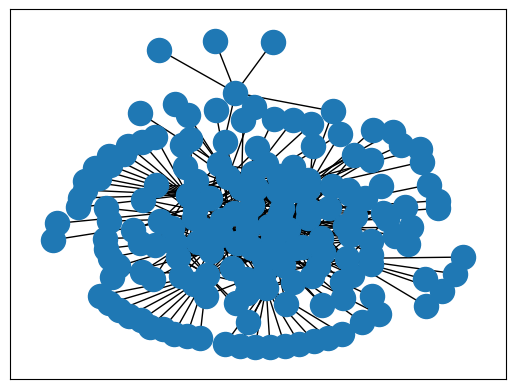

In [59]:
pos=nx.kamada_kawai_layout(G)
nx.draw_networkx(G, pos, with_labels=False)

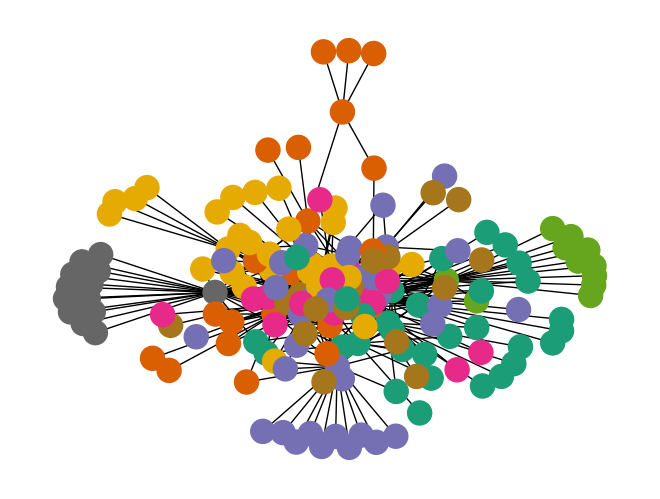

In [60]:
import seaborn as sns
import community as community_louvain

part=community_louvain.best_partition(G)

palette = sns.color_palette("Dark2", max(part.values())+1)

#colors=['blue', 'red','green', 'yellow']
color_map = []

for node in G:
    color_index=part[node]
    color_map.append(palette[color_index])
    
nx.draw(G, node_color=color_map, with_labels=False)
plt.show()

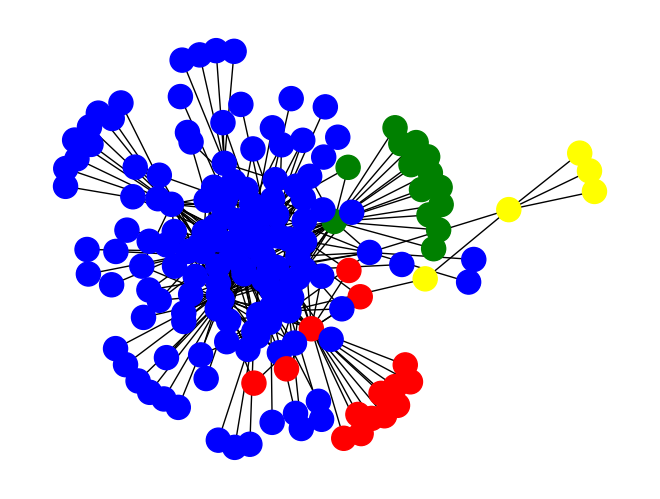

In [61]:
k=4
comp =list( nx.algorithms.community.girvan_newman(G))[k-2]
colors=['blue', 'red','green', 'yellow']
color_map = []

for node in G:
    if node in comp[0]:
        color_map.append(colors[k-4])
    
    elif node in comp[1]: 
        color_map.append(colors[k-3])
   
    elif node in comp[2]: 
        color_map.append(colors[k-2])
    
    else:
        color_map.append(colors[k-1])

nx.draw(G, node_color=color_map, with_labels=False)
plt.show()

### Insights from visualizations 

Although, for the moment the connection map is absent, it is from the coloropleth map that we obtain the important insights.
As it is possible to see, in fact, it is evident that for the most part all the transfers are from within Europe, with peaks the same Great Britain.
One last thing to notice, is that immediately after the european countries, the next most important supplier of players is Brazil, which since is a country where football is hugely popular is coherent with our analysis. 
Given that, we would like to investigate further insights for differences between Premier League's purchases with others visualizations. A possibility is to analyze Premier League as a network, studying centrality, betweenness and clusters. Above are shown two examples on networkX, that we will use as a starting point for interactive visualization in pyvis. 
